In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Step 1: Load Data

In [ ]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/softwareWCU/Data-Preprocessing-for-ML-using-Titanic-Dataset/main/titanic2.csv")
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,909.000000,909.000000,710.000000,909.000000,909.000000,891.000000
mean,446.040704,0.387239,29.603169,0.522552,0.380638,31.431149
std,257.212740,0.487387,14.566894,1.098050,0.802185,46.797866
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,669.000000,1.000000,38.000000,1.000000,0.000000,30.847900
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


handle missing values

In [ ]:
df.drop(columns=['Cabin'],inplace=True,errors='ignore')
df.columns.tolist()
df.describe()


,PassengerId,Survived,Age,SibSp,Parch,Fare
count,909.000000,909.000000,710.000000,909.000000,909.000000,891.000000
mean,446.040704,0.387239,29.603169,0.522552,0.380638,31.431149
std,257.212740,0.487387,14.566894,1.098050,0.802185,46.797866
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,445.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,669.000000,1.000000,38.000000,1.000000,0.000000,30.847900
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,199
SibSp,0
Parch,0
Ticket,0
Fare,18


#Handling mising value:less than 50% df.isnull().sum()/df,shape[0]*100

#Filing Age values with Median

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [ ]:
df.isnull().sum()/df.shape[0]*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,0.000000
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,1.980198


using KNN imputer to fill the missing values to aga and fare

In [ ]:
from sklearn.impute import KNNImputer
cols_to_impute = ["Age", "Fare"]
imputer = KNNImputer(n_neighbors=5)   # you can change K later


#fill values with mode to embarked

for categorical values filling it with mode is prepared

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,18


#fill Values to Fare With Median

In [ ]:
df['Fare'] = df['Fare'].fillna(
    df.groupby('Pclass')['Fare'].transform('median')
)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


#Age limit using IQR

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f"Number of Age outliers: {len(outliers)}")

Lower Bound: 2.5
Upper Bound: 54.5
Number of Age outliers: 65


#Data Spliting:70%,15% Validation,15% Test

In [ ]:
from sklearn.model_selection import train_test_split


#Model Evaluation and Metrix Interpretaion

In [ ]:
from dklearn.merics import accuracy_score,classificaition

ModuleNotFoundError: No module named 'dklearn'

#Drop columns

In [ ]:
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

#Visualize with box flot


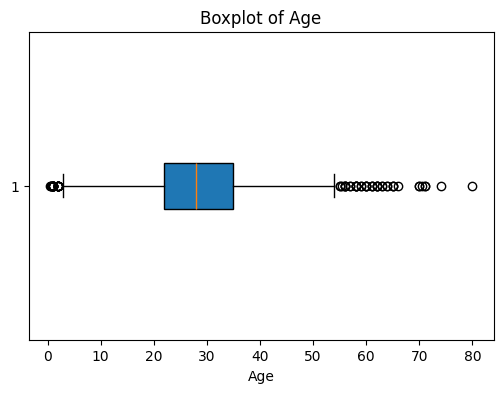

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.boxplot(df['Age'], vert=False, patch_artist=True)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

#Remove Outliers in Age


In [ ]:
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

#After Removing outliers in Age

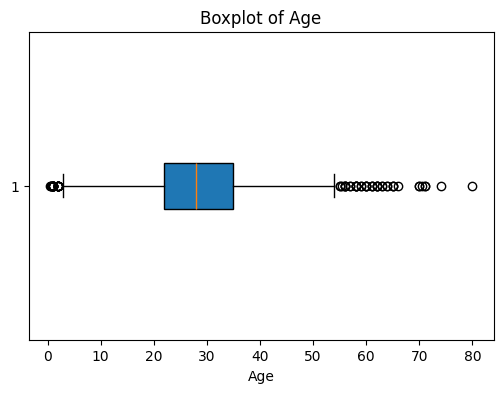

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Age'], vert=False, patch_artist=True)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

#Remove Outliers in Age


In [ ]:
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

#After Removing outliers in Age

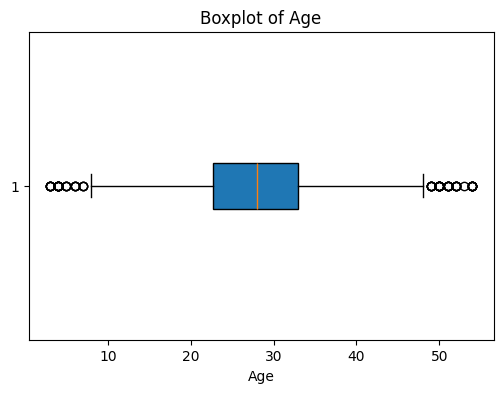

In [ ]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Age'], vert=False, patch_artist=True)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

#Detecting Dupilicated Data

In [ ]:
df.duplicated(subset=['Name']).sum()

np.int64(17)

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
904,False
905,False
906,True
907,False


#Remove Duplicates

In [ ]:
df.duplicated().sum()

np.int64(10)

#Make data values consistent

In [ ]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,844.000000,844.000000,844.000000,844.000000,844.000000,826.000000
mean,447.216825,0.385071,28.382701,0.508294,0.359005,30.795081
std,256.835730,0.486901,10.096121,1.085296,0.796062,46.985652
min,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,226.750000,0.000000,22.750000,0.000000,0.000000,7.895800
50%,443.500000,0.000000,28.000000,0.000000,0.000000,13.208350
75%,671.250000,1.000000,33.000000,1.000000,0.000000,30.000000
max,891.000000,1.000000,54.000000,8.000000,6.000000,512.329200


#Check the unique values first

In [ ]:
print("Sex:", df['Sex'].unique())

Sex: ['male' 'female' 'Female' 'MALE' 'Male' 'male ' 'FEMALE']


In [ ]:
print("Pclass:", df['Pclass'].unique())

Pclass: ['3' '1' '2' '3rd ']


In [ ]:
print("Embarked:", df['Embarked'].unique())

Embarked: ['S' 'C' 'Q' 'c ' ' Cherbourg' 'southampton' nan 's' 'q']


#Clean Sex Column

In [ ]:
df['Sex'] = df['Sex'].astype(str).str.strip().str.lower()
df['Sex'] = df['Sex'].replace({
    'male': 'male',
    'female': 'female'
})

In [ ]:
print("Sex:", df['Sex'].unique())

Sex: ['male' 'female']


#clean the Pclass

In [ ]:
df['Pclass'] = df['Pclass'].astype(str).str.strip().str.lower()
df['Pclass'] = df['Pclass'].replace({
    '3rd': '3'
})
df['Pclass'] = df['Pclass'].astype(int)

In [ ]:
print("Pclass:", df['Pclass'].unique())

Pclass: [3 1 2]


#clean the Pclass

In [ ]:
df['Pclass'] = df['Pclass'].astype(str).str.strip().str.lower()
df['Pclass'] = df['Pclass'].replace({
    '3rd': '3'
})
df['Pclass'] = df['Pclass'].astype(int)

In [ ]:
print("Pclass:", df['Pclass'].unique())

Pclass: [3 1 2]


#Clean Embarked

In [ ]:
df['Embarked'] = df['Embarked'].astype(str).str.strip().str.lower()

df['Embarked'] = df['Embarked'].replace({
    's': 'Southampton',
    'southampton': 'S',
    'c': 'Cherbourg',
    'cherbourg': 'C',
    'q': 'Queenstown',
    'queenstown': 'Q'
})


#Select Important Feaures

In [ ]:
print("Embarked:", df['Embarked'].unique())

Embarked: ['Southampton' 'Cherbourg' 'Queenstown' 'C' 'S' 'nan']


#Encode Sex (Binary → Label Encoding)

In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [ ]:
print("Sex:", df['Sex'].unique())

Sex: [0 1]


In [ ]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare     Embarked  
0         A/5 21171   7.2500  Southampton  
1          PC 17599  71.2833    Cherbourg  
2  STON/O2. 3101282   7.9250  Southampton  
3            113803  53.1000  Southampton  
4            373450   8.0500  Southampton  


#Feature Engineering


In [ ]:
df['Title'] = df['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)
rare_map = {
    'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs',
    'Lady':'Royalty','Countess':'Royalty','Sir':'Royalty','Dona':'Royalty',
    'Capt':'Officer','Col':'Officer','Major':'Officer','Dr':'Officer','Rev':'Officer'
}

df['Title'] = df['Title'].replace(rare_map)#.map(rare_map).fillna(0)


In [ ]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Don', 'Master', 'Officer', 'Royalty',
       'Jonkheer'], dtype=object)

#Scaterflow to show the r/n ship between features and prediction

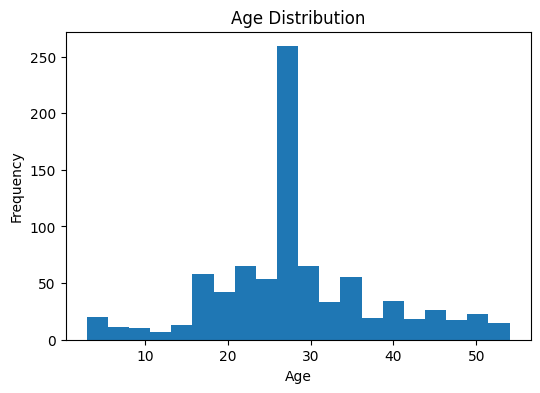

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df['Age'].dropna(), bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

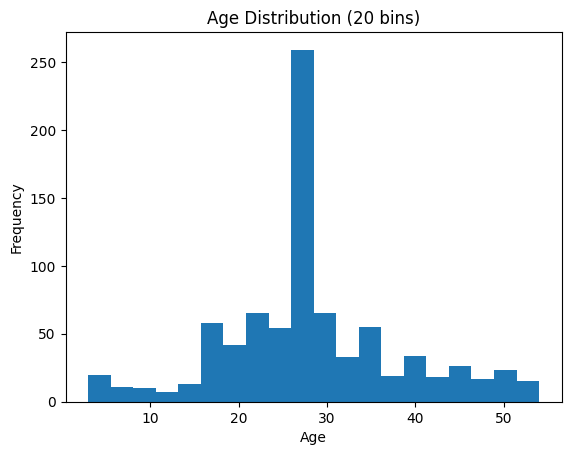

In [ ]:
plt.hist(df['Age'].dropna(), bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution (20 bins)")
plt.show()

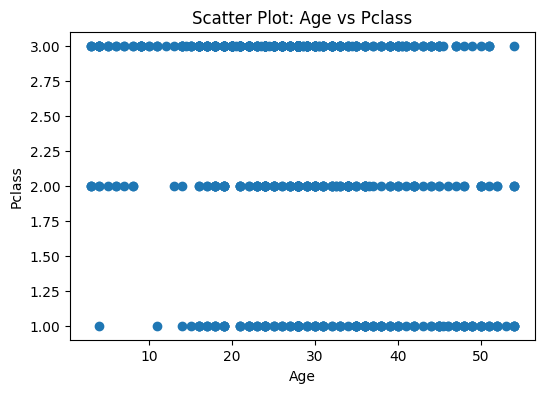

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df['Age'], df['Pclass'])
plt.xlabel("Age")
plt.ylabel("Pclass")
plt.title("Scatter Plot: Age vs Pclass")
plt.show()

# 1. Further Feature Engineering,# Create FamilySize combining SibSp (siblings/spouse) and Parch (parents/children) + the passenger themselves

In [101]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create IsAlone feature (binary: 1 if alone, 0 if not)

In [102]:
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Drop columns that won't be used for the model

In [103]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch']

In [104]:
df_final = df.drop(columns=columns_to_drop, errors='ignore')

In [105]:
print("Final columns before encoding:")

Final columns before encoding:


In [106]:
print(df_final.columns.tolist())

['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone']


In [107]:
print(df_final.head())

   Survived  Pclass  Sex   Age     Fare     Embarked Title  FamilySize  \
0         0       3    0  22.0   7.2500  Southampton    Mr           2   
1         1       1    1  38.0  71.2833    Cherbourg   Mrs           2   
2         1       3    1  26.0   7.9250  Southampton  Miss           1   
3         1       1    1  35.0  53.1000  Southampton   Mrs           2   
4         0       3    0  35.0   8.0500  Southampton    Mr           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1  


Encoding and Scaling

# Separate Target and Features

In [120]:
if 'df_final' in locals():
    X = df_final.drop('Survived', axis=1)
    y = df_final['Survived']
else:
    print("Error: 'df_final' does not exist. Please run previous data preparation steps.")

KNN Modeling with Hyperparameter Tuning.To get the best accuracy, we shouldn't just pick a random 'K'. We use GridSearch to try different values of K based on cross-validation scores

In [116]:
categorical_features = ['Embarked', 'Title']

In [117]:
numerical_features = ['Age', 'Fare', 'FamilySize', 'Pclass']

Split data into train and test sets

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (675, 8)
Test set shape: (169, 8)


KNN Modeling with Hyperparameter Tuning (GridSearchCV)
To get the best accuracy, we shouldn't just pick a random 'K'. We use GridSearch to try different values of K based on cross-validation scores.

In [123]:
param_grid = {
    'classifier__n_neighbors': list(range(3, 26, 2)),
    'classifier__weights': ['uniform', 'distance'], # Try uniform vs distance weighting
    'classifier__metric': ['euclidean', 'manhattan'] # Try different distance metrics
}

# Train the model (this performs the search)

In [124]:
print("Starting Grid Search for KNN...")


Starting Grid Search for KNN...
